#                              Micro-Credit Defaulter Model
Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:                          
- There are no null values in the dataset.                     
- There may be some customers with no loan history.                          
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.                   
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.                          
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.                            
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.                       


Variable	             Definition
- label	       ---        Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn	    --        mobile number of user
- aon	        --      age on cellular network in days
- daily_decr30	--        Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90   --    	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30  	 --          Average main account balance over last 30 days
- rental90	     --          Average main account balance over last 90 days
- last_rech_date_ma	 --            Number of days till last recharge of main account
- last_rech_date_da	--            Number of days till last recharge of data account
- last_rech_amt_ma	--          Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30	    --       Number of times main account got recharged in last 30 days
- fr_ma_rech30	   --   Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30	  --       Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30	 --      Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30	   --    Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90  --  Number of times main account got recharged in last 90 days
- fr_ma_rech90--	Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90	--Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90-- 	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90	--  Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30	--Number of times data account got recharged in last 30 days
- fr_da_rech30--	Frequency of data account recharged in last 30 days
- cnt_da_rech90	--Number of times data account got recharged in last 90 days
- fr_da_rech90	---Frequency of data account recharged in last 90 days
- cnt_loans30--	Number of loans taken by user in last 30 days
- amnt_loans30	 -- Total amount of loans taken by user in last 30 days
- maxamnt_loans30-- 	maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30-- 	Median of amounts of loan taken by the user in last 30 days
- cnt_loans90-- 	Number of loans taken by user in last 90 days
- amnt_loans90	-- Total amount of loans taken by user in last 90 days
- maxamnt_loans90	-- maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90	-- Median of amounts of loan taken by the user in last 90 days
- payback30-- 	Average payback time in days over last 30 days
- payback90--	Average payback time in days over last 90 days
- pcircle-- 	telecom circle
- pdate	date


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
ds= pd.read_csv("Data file.csv")

In [3]:
ds.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
ds.shape

(209593, 37)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

 Object Type 
- msisdn -- mobile number of user -  it will not contribute to the analysis so will remove this column 
- pcircle-- telecom circle
- pdate --- date                -- convert it into date time 

NO null value

In [6]:
ds['pcircle'].unique()

array(['UPW'], dtype=object)

pcircle-- telecom circle has single variable so will remove this too 

In [7]:
ds['pdate']=pd.to_datetime(ds['pdate'])
ds['pdate']

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 209593, dtype: datetime64[ns]

Fetching data from it 

In [8]:
ds['year']=ds['pdate'].dt.year
ds['year'].unique()

array([2016], dtype=int64)

All data has been taken for year - 2016 ,                 
single variable for year columns so will remove it

In [9]:
ds['month']=ds['pdate'].dt.month
ds['month'].value_counts()

7    85765
6    83154
8    40674
Name: month, dtype: int64

 3 months data it is 

In [10]:
ds['day']=ds['pdate'].dt.day
ds['day'].value_counts()

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: day, dtype: int64

In [11]:
ds.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,year,month,day
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,2016,7,20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,2016,8,10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,2016,8,19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,2016,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,2016,6,22


NOW will remove the 'msisdn' , 'pcircle'and    'pdate'  columns as object type and not required 

In [12]:
dsn = ds.drop(columns=['Unnamed: 0','msisdn','pcircle' ,'pdate','year'])

In [13]:
dsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [14]:
pd.set_option('display.max_columns', 50)
dsn.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [15]:
dsn.describe(include='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


- label - ( 0 - failure & 1 - success )                   
   mean = .87   means most of the people have succeeded in paying loan                  
   means it is highly imbalance 

# Some of the data has min value in negative - which can't be possible 
  so will replace it with ethier zero or remove the data 
  
 like in columns -  -- aon ,daily_decr30,	daily_decr90,	rental30,	rental90,	last_rech_date_ma,	last_rech_date_da and  medianmarechprebal30		

# Outlier present in many columns 
(max value is so high then mean )/ (min value is so less then mean)                 
_ will check otlier in each 

In [16]:
#checking for duplicates values 
sum(dsn.duplicated())

31

In [17]:
#removing duplicates values 
dsn=dsn.drop_duplicates()

In [18]:
dsn.shape

(209562, 35)

1    183429
0     26133
Name: label, dtype: int64


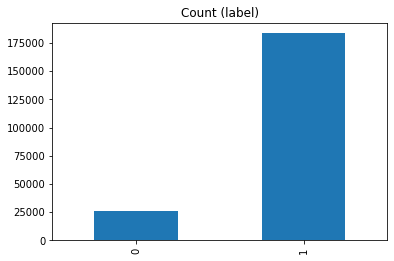

In [19]:
label_count=dsn['label'].value_counts()
print(label_count)
label_count.plot(kind='bar', title='Count (label)');

In [20]:
count = (dsn<0).sum().sum()
count

21477

we can't remove all the negative value columns as it will lead to more data loss    
 100 - ((209593-21477)/209593)*100 = 10.2 approx                       
we also know that this data can't be negative so might be typing error so will replace it with its positive value 

In [21]:
dsn= dsn.abs()

In [22]:
dsn.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
count,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000
mean,0.875297,8113.978138,5382.199013,6083.415575,2715.762079,3510.000141,3756.681474,3712.753938,2064.754512,3.978622,3737.907974,7705.599512,1813.078774,3854.788707,6.316341,7.717916,12398.010741,1864.864303,94.449827,262.616952,3750.049100,0.041501,0.045719,2.759226,17.953703,274.698489,0.054037,18.523497,23.647923,6.703238,0.046084,3.399125,4.321920,6.797406,14.399514
std,0.330383,75701.570138,9221.069690,10919.366781,4294.452129,5754.903184,53909.840452,53378.761879,2370.831005,4.256138,53647.573470,10139.952367,2070.904097,54010.185037,7.193605,12.590836,16858.386213,2081.714948,368.631937,4184.206206,53889.381122,0.397585,0.951456,2.554603,17.380433,4245.577376,0.218054,224.813949,26.470977,2.104003,0.200706,8.813867,10.308399,0.741434,8.438943
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,42.481250,42.715333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.700000,2.000000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1470.465667,1500.000000,1095.910000,1347.620000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.000000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.000000
75%,1.000000,982.000000,7246.000000,7804.000000,3362.850000,4205.180000,7.000000,0.000000,2309.000000,5.000000,6.000000,10011.000000,1924.000000,85.300000,8.000000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.000000


In [23]:
dsn.shape

(209562, 35)

In [24]:
dsn.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
label,1.000000,-0.003828,0.168169,0.166030,0.058444,0.075850,0.003707,0.001687,0.131558,0.237120,0.001306,0.202658,0.141248,-0.004871,0.236200,0.084205,0.205634,0.120594,0.037051,0.003806,-0.000052,0.002962,-0.005438,0.196133,0.197123,0.000225,0.044521,0.004707,0.199649,0.084064,0.035681,0.048213,0.049050,0.154707,0.006630
aon,-0.003828,1.000000,0.001092,0.000362,-0.000806,-0.000703,0.001691,-0.001694,0.004240,-0.003166,-0.001164,0.000692,0.004290,0.003928,-0.002742,0.004391,0.000996,0.004893,-0.000986,0.001563,0.000891,0.001119,0.005394,-0.001840,-0.001740,-0.002765,0.004661,-0.000612,-0.002333,-0.001199,0.002768,0.001935,0.002197,-0.001881,0.000652
daily_decr30,0.168169,0.001092,1.000000,0.977703,0.441503,0.459173,0.000478,-0.001641,0.275786,0.451345,-0.000583,0.636514,0.295306,-0.001166,0.587311,-0.078356,0.762968,0.257793,0.036412,0.000695,-0.001505,0.038806,0.020669,0.366080,0.471462,-0.000033,-0.011632,0.008956,0.563472,0.400184,-0.037325,0.026890,0.047147,0.518645,0.006440
daily_decr90,0.166030,0.000362,0.977703,1.000000,0.434079,0.471869,0.000900,-0.001892,0.264082,0.426669,-0.000349,0.603864,0.282912,-0.000759,0.593044,-0.079584,0.768805,0.250467,0.035299,0.000656,-0.001575,0.031148,0.016433,0.340351,0.447839,0.000020,-0.005612,0.009440,0.567181,0.397236,-0.034705,0.019376,0.040774,0.539396,-0.021546
rental30,0.058444,-0.000806,0.441503,0.434079,1.000000,0.955012,-0.001183,0.003163,0.134369,0.235421,-0.001214,0.285550,0.138129,-0.001373,0.312891,-0.033207,0.350834,0.118462,0.028329,-0.000960,-0.002365,0.072552,0.047155,0.181056,0.234139,-0.000757,-0.016559,0.004077,0.298844,0.234084,-0.035451,0.072857,0.094795,0.362728,0.038267
rental90,0.075850,-0.000703,0.459173,0.471869,0.955012,1.000000,-0.001787,0.002684,0.127823,0.231840,-0.000531,0.270456,0.127348,-0.001217,0.346088,-0.036215,0.368379,0.110409,0.030591,-0.000173,-0.002228,0.056542,0.037246,0.172134,0.232386,-0.001357,-0.009538,0.005176,0.327441,0.251230,-0.034134,0.066976,0.099228,0.427688,0.010083
last_rech_date_ma,0.003707,0.001691,0.000478,0.000900,-0.001183,-0.001787,1.000000,0.001789,-0.000155,0.004299,-0.001630,0.002096,-0.001366,0.004070,0.004252,0.001412,0.002234,-0.000734,-0.001092,-0.003468,-0.003627,-0.003539,-0.002396,0.001183,0.000893,0.000928,0.001833,-0.000226,0.000860,-0.001128,0.002769,-0.002237,-0.001588,-0.001221,0.000552
last_rech_date_da,0.001687,-0.001694,-0.001641,-0.001892,0.003163,0.002684,0.001789,1.000000,-0.000158,0.001540,0.001157,0.000039,0.001028,0.002846,0.001263,0.000792,-0.000422,0.000210,0.003928,-0.003628,-0.000074,-0.001860,-0.000204,0.000373,0.000529,0.000502,0.000059,-0.000973,0.000512,0.001520,-0.002241,0.000075,0.000414,-0.001808,0.000626
last_rech_amt_ma,0.131558,0.004240,0.275786,0.264082,0.134369,0.127823,-0.000155,-0.000158,1.000000,-0.002778,0.002868,0.440769,0.794624,-0.002353,0.016599,0.106198,0.418682,0.818714,0.124656,-0.001845,-0.003239,0.014767,0.016037,-0.027699,0.008418,0.000992,0.028341,0.000083,0.013985,0.148427,0.020976,-0.027408,-0.014304,0.096832,0.028825
cnt_ma_rech30,0.237120,-0.003166,0.451345,0.426669,0.235421,0.231840,0.004299,0.001540,-0.002778,1.000000,0.001660,0.656953,-0.011910,0.000069,0.886421,-0.152855,0.584021,-0.051473,0.012694,0.002298,-0.002741,0.011968,0.006983,0.765783,0.752277,0.000101,-0.067048,0.014694,0.685232,0.174072,-0.071486,0.043565,0.017304,0.156061,0.068582


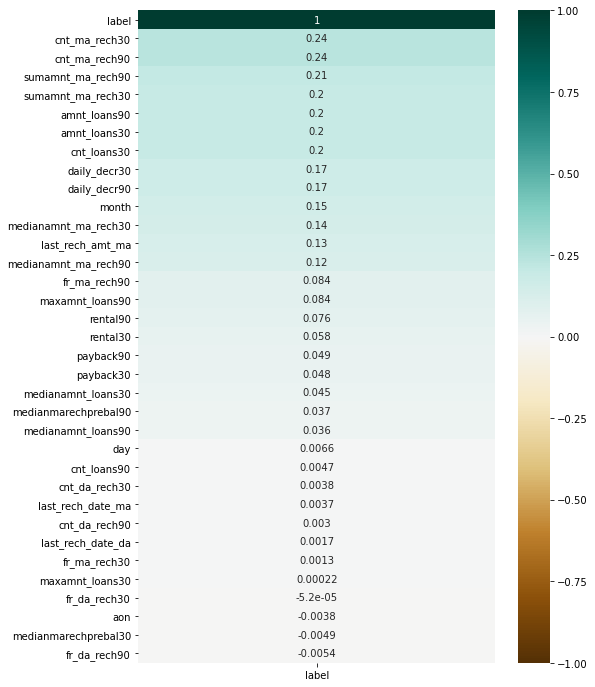

In [25]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dsn.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [26]:
dsn.skew()

label                   -2.271915
aon                     10.392162
daily_decr30             3.946012
daily_decr90             4.252326
rental30                 4.560331
rental90                 4.467079
last_rech_date_ma       14.789866
last_rech_date_da       14.813747
last_rech_amt_ma         3.781206
cnt_ma_rech30            3.283935
fr_ma_rech30            14.771725
sumamnt_ma_rech30        6.386845
medianamnt_ma_rech30     3.512361
medianmarechprebal30    14.778775
cnt_ma_rech90            3.425285
fr_ma_rech90             2.285206
sumamnt_ma_rech90        4.897896
medianamnt_ma_rech90     3.752792
medianmarechprebal90    45.083491
cnt_da_rech30           17.817034
fr_da_rech30            14.775322
cnt_da_rech90           27.265281
fr_da_rech90            28.985932
cnt_loans30              2.713259
amnt_loans30             2.975560
maxamnt_loans30         17.656733
medianamnt_loans30       4.550661
cnt_loans90             16.593169
amnt_loans90             3.149830
maxamnt_loans9

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 


In [28]:
dsn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209562 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209562 non-null  int64  
 1   aon                   209562 non-null  float64
 2   daily_decr30          209562 non-null  float64
 3   daily_decr90          209562 non-null  float64
 4   rental30              209562 non-null  float64
 5   rental90              209562 non-null  float64
 6   last_rech_date_ma     209562 non-null  float64
 7   last_rech_date_da     209562 non-null  float64
 8   last_rech_amt_ma      209562 non-null  int64  
 9   cnt_ma_rech30         209562 non-null  int64  
 10  fr_ma_rech30          209562 non-null  float64
 11  sumamnt_ma_rech30     209562 non-null  float64
 12  medianamnt_ma_rech30  209562 non-null  float64
 13  medianmarechprebal30  209562 non-null  float64
 14  cnt_ma_rech90         209562 non-null  int64  
 15  

# Working on imbalance 'label'

In [29]:
X = dsn.drop(columns='label')
y= dsn['label']

In [30]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True), 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True), 2)}''')

% Positive class in Train = 1    0.88
0    0.12
Name: label, dtype: float64
% Positive class in Test  = 1    0.87
0    0.13
Name: label, dtype: float64


# Machine learning with Imbalance 
Let’s start with a naive approach.               
Random Forest model on the dataset and completely ignore the class imbalance

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')


Accuracy = 0.92
Recall = 0.98



# Correcting the imbalace by using
# 'SMOTE(Synthetic Minority Oversampling Technique)'

In [32]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (209562, 34)
Shape of X after SMOTE: (366858, 34)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: label, dtype: float64

Accuracy = 0.95
Recall = 0.95



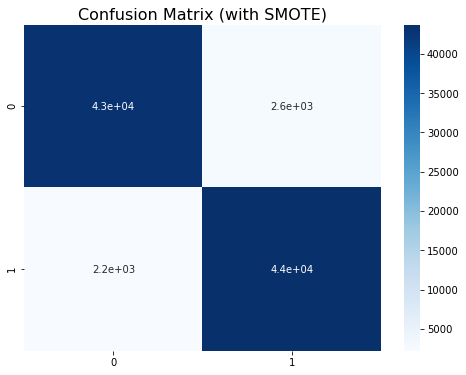

In [33]:

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score,recall_score,precision_score
from sklearn.metrics import auc,roc_curve

In [36]:

#Run model for Logistic Regression
model_sel(LogisticRegression(max_iter=30000))

****************** Metrics *********************

Accuracy of the model is 0.7592433080739247
Recall of the model is 0.6841864517534306
Precision of the model is 0.8055548431769805
F1 score of the model is 0.7399267399267399

************** Confusion Matrix ****************

[[38223  7582]
 [14499 31411]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.72      0.83      0.78     45805
           1       0.81      0.68      0.74     45910

    accuracy                           0.76     91715
   macro avg       0.77      0.76      0.76     91715
weighted avg       0.77      0.76      0.76     91715



In [54]:
#Run Model for RandomForestClassifier
model_sel(RandomForestClassifier())

****************** Metrics *********************

Accuracy of the model is 0.9478602191571717
Recall of the model is 0.9524722282727075
Precision of the model is 0.9438784320497323
F1 score of the model is 0.9481558576725427

************** Confusion Matrix ****************

[[43205  2600]
 [ 2182 43728]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     45805
           1       0.94      0.95      0.95     45910

    accuracy                           0.95     91715
   macro avg       0.95      0.95      0.95     91715
weighted avg       0.95      0.95      0.95     91715



In [55]:
#Run Model for AdaBoostClassifier
model_sel(AdaBoostClassifier())

****************** Metrics *********************

Accuracy of the model is 0.859793926838576
Recall of the model is 0.8437159660204748
Precision of the model is 0.8720367410342421
F1 score of the model is 0.8576426175425389

************** Confusion Matrix ****************

[[40121  5684]
 [ 7175 38735]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     45805
           1       0.87      0.84      0.86     45910

    accuracy                           0.86     91715
   macro avg       0.86      0.86      0.86     91715
weighted avg       0.86      0.86      0.86     91715



In [ ]:
#Run Model for Support Vector Machines
model_sel(SVC())


In [ ]:
#Run Model for KNeighbors
model_sel(KNeighborsClassifier())

In [37]:
#Create XGboost Dataset
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

#Create Parameters for XGboost
param = {
    'eta': 0.6, 
    'max_depth': 30,  
    'objective': 'multi:softprob',  
    'num_class': 3}
steps = 80  # The number of training iterations

#Train the model
model = xgb.train(param, D_train, steps)

#Perform Prediction
preds = model.predict(D_test)

#Choose best Prediction
best_preds = np.asarray([np.argmax(line) for line in preds])

print("****************** Metrics *********************")
print()
print("Accuracy of the model is {}".format(accuracy_score(y_test,best_preds)))
print("Recall of the model is {}".format(recall_score(y_test,best_preds)))
print("Precision of the model is {}".format(precision_score(y_test,best_preds)))
print("F1 score of the model is {}".format(f1_score(y_test,best_preds)))
print()
print("************** Confusion Matrix ****************")
print()
print(confusion_matrix(y_test,best_preds))
print()
print("*********** Classification Report **************")
print()
print(classification_report(y_test,best_preds))

model_list.append('XGBoost')
score_list.append(round(f1_score(y_test,best_preds),3))


[17:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
****************** Metrics *********************

Accuracy of the model is 0.9528103363680969
Recall of the model is 0.9583097364408626
Precision of the model is 0.947985347985348
F1 score of the model is 0.9531195840554593

************** Confusion Matrix ****************

[[43391  2414]
 [ 1914 43996]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     45805
           1       0.95      0.96      0.95     45910

    accuracy                           0.95     91715
   macro avg       0.95      0.95      0.95     91715
weighted avg       0.95      0.95      0.95     91715



NameError: name 'FormatStrFormatter' is not defined

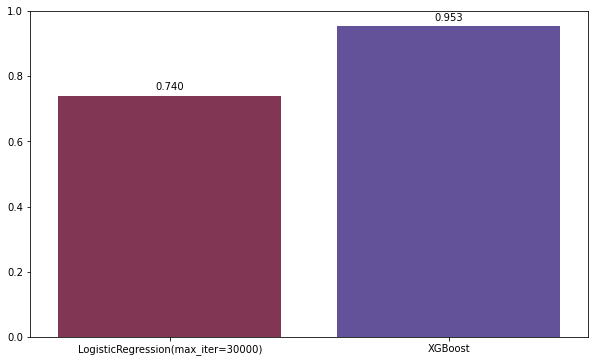

In [38]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
splot=sns.barplot(x=model_list,y=score_list,palette='twilight_r',tick_label=score_list,ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0.00, 9.00), 
                   textcoords = 'offset points')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel('Model')
ax.set_ylabel('F1Score')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('Images//6.Model_Performance.jpeg',dpi=300)
plt.show()